# Intro

## What is Natural Language Processing 

People always tell me they could never learn to code. I promptly ask what language they asked me that in. My limited diversity in understanding natural languages means the response is always English.

English as with every other language spoken by humans is a natural language. It is the antonym to computer code, which follows a clearly designed structure, a solid set of rules. Attempts to step outside that structure would prevent the computer understanding and cause it to crash.

Our natural languages are far more flexible. The meaning of a word can change based on the context of the sentence. 


Natural Language processing is using computation to analyse our natural languages. Advances in the field of deep leanring has given back some of that flexibility 




In [1]:
import spacy

%load_ext nb_black

nlp = spacy.load("en_core_web_sm")

<IPython.core.display.Javascript object>

In [2]:
# Process sentences 'Hello, world. Antonio is learning Python.' using spaCy
doc = nlp("Hello, world. Antonio is learning Python.")
nlp.__dict__

{'_config': {'paths': {'train': None,
   'dev': None,
   'vectors': None,
   'init_tok2vec': None},
  'system': {'gpu_allocator': None, 'seed': 0},
  'nlp': {'lang': 'en',
   'pipeline': ['tok2vec',
    'tagger',
    'parser',
    'senter',
    'attribute_ruler',
    'lemmatizer',
    'ner'],
   'disabled': ['senter'],
   'before_creation': None,
   'after_creation': None,
   'after_pipeline_creation': None,
   'batch_size': 256,
   'tokenizer': {'@tokenizers': 'spacy.Tokenizer.v1'}},
  'components': {'attribute_ruler': {'factory': 'attribute_ruler',
    'scorer': {'@scorers': 'spacy.attribute_ruler_scorer.v1'},
    'validate': False},
   'lemmatizer': {'factory': 'lemmatizer',
    'mode': 'rule',
    'model': None,
    'overwrite': False,
    'scorer': {'@scorers': 'spacy.lemmatizer_scorer.v1'}},
   'ner': {'factory': 'ner',
    'incorrect_spans_key': None,
    'moves': None,
    'scorer': {'@scorers': 'spacy.ner_scorer.v1'},
    'update_with_oracle_cut_size': 100,
    'model': {'@arc

<IPython.core.display.Javascript object>

## Get tokens and sentences

#### What is a Token?
A token is a single chopped up element of the sentence, which could be a word or a group of words to analyse. The task of chopping the sentence up is called "tokenisation".

Example: The following sentence can be tokenised by splitting up the sentence into individual words.

	"Antonio is learning Python!"
	["Antonio","is","learning","Python!"]

In [3]:
# Get first token of the processed document
token = doc[0]
print(token)

# Print sentences (one sentence per line)
for sent in doc.sents:
    print(sent)

Hello
Hello, world.
Antonio is learning Python.


<IPython.core.display.Javascript object>

## Part of speech tags

#### What is a Speech Tag?
A speech tag is a context sensitive description of what a word means in the context of the whole sentence.
More information about the kinds of speech tags which are used in NLP can be [found here](http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/).

Examples:

1. CARDINAL, Cardinal Number - 1,2,3
2. PROPN, Proper Noun, Singular - "Jan", "Javier", "Antonio", "Italy"
3. INTJ, Interjection - "Ohhhhhhhhhhh"

In [4]:
# For each token, print corresponding part of speech tag
for t in doc:
    print(f"{t} tag: {t.tag_}, dep: {t.dep_}")

Hello tag: UH, dep: ROOT
, tag: ,, dep: punct
world tag: NN, dep: npadvmod
. tag: ., dep: punct
Antonio tag: NNP, dep: nsubj
is tag: VBZ, dep: aux
learning tag: VBG, dep: ROOT
Python tag: NNP, dep: dobj
. tag: ., dep: punct


<IPython.core.display.Javascript object>

In [5]:
from spacy import displacy

<IPython.core.display.Javascript object>

In [85]:
displacy.render(doc, style='dep')




<IPython.core.display.Javascript object>

In [7]:
displacy.render(doc, style = "ent",jupyter = True)


<IPython.core.display.Javascript object>

We have said that dependency structures are represented by directed graphs that satisfy the following constraints:

1. There is a single designated root node that has no incoming arcs.

2. With the exception of the root node, each vertex has exactly one incoming arc.

3. There is a unique path from the root node to each vertex in V.

You can inspect the head of each token by invoking the `.head` attribute of a spaCy token:


In [8]:
doc[2]

world

<IPython.core.display.Javascript object>

In [86]:
doc[2].head

Hello

<IPython.core.display.Javascript object>

So how would you search for the root?

Since there is a unique path from the root node to each vertex in V, there's only one root node that has no incoming arcs, we can search for the token which have as head itself!

In [10]:
for token in doc:
    if token.head == token:
        print(token)

print("pt2")
for token in doc:
    print(token)

Hello
learning
pt2
Hello
,
world
.
Antonio
is
learning
Python
.


<IPython.core.display.Javascript object>

As expected, since there were two sentences in the doc, we got two roots.

We can also build a function that, given a spaCy token, gives the path till the root:

In [11]:
# Define a function to find the path to the root of each word in a sentence


def path_to_the_root(token, current_path=""):
    new_path = current_path
    if token == token.head:
        return current_path
    else:
        new_path += str(token)
        new_path += " -> "
        new_path += str(token.head)
        return path_to_the_root(token.head, new_path)


<IPython.core.display.Javascript object>

In [12]:
path_to_the_root(doc[4])

'Antonio -> learning'

<IPython.core.display.Javascript object>

## Embeddings 

An embedding is a fixed sizes numerical vector that attempts to encode some semantic meaning of the word or sentence it is encoding. The distributional hypothesis is usually the concept behind most embeddings. This hypothesis states that words which often have the same neighboring words tend to be semantically similar. For example if 'football' and 'basketball' usually appear close the word 'play' we assume that they will be semantically similar. An algorithm that is based on this concept is Word2Vec. A common way of obtaining sentence embeddings is to average the word embeddings inside the sentence and use that average as the representation of the whole sentence. 

- In spacy every token has its embedding.
- It is under the attribute 'vector'.
- In spacy embeddings are of size 96 or 128.


Obtain the embeddings of all the tokens.

In [13]:
embeddings = [t.vector for t in doc]
embeddings



[array([ 0.4658472 , -0.79063433, -0.50985324, -0.48657903, -0.4015515 ,
         2.4269686 ,  0.42101833, -0.47137287, -1.1158198 ,  0.06877601,
        -0.89438426,  0.06631641,  0.24857631,  0.98096853, -0.79483426,
        -0.2356089 , -0.77629834,  0.18954283,  0.43949094,  0.7599067 ,
         0.8835094 , -1.1393111 , -0.13242015, -0.35364997,  0.710623  ,
        -0.95154554,  1.5263536 , -0.17323782,  0.37644452, -1.113508  ,
        -0.32952836, -0.8091007 ,  0.28211585,  0.39706555, -0.67209643,
        -1.0867163 , -1.2614272 ,  1.0693526 , -1.2859553 ,  0.9185683 ,
        -0.76368386,  0.0704084 ,  1.1826416 ,  0.90628624, -0.76041985,
         0.7137258 , -0.90300655, -0.22170897, -0.7641163 , -0.22525564,
        -0.02980447, -0.12987551, -0.4582414 , -1.1656992 , -0.24644923,
        -0.15060201, -0.3655731 , -0.80722404, -0.5258828 , -0.90773857,
        -0.23269966,  1.4253358 ,  0.03738025, -1.5750887 ,  0.81604064,
         1.1399844 , -0.6753164 ,  0.05795562, -0.1

<IPython.core.display.Javascript object>

## Semantic similarity 

To compute the semantic similarity between two sentences, $u$ and $v$, we measure the cossine similarity between the two sentence embeddings. The formula is as follows:

$sim(u, v) = \frac{u \cdot v}{||u|| ||v||} $


Use the following formula to get the semantic similarity betwen the words in doc.
Feel free to test it between differente words too

In [14]:
def semantic_sim(u, v):
    return np.matmul(u, v) / np.abs(np.matmul(np.abs(u), np.abs(v)))

<IPython.core.display.Javascript object>

# Pride and Prejudice analysis

We would like to:

- Extract the names of all the characters from the book (e.g. Elizabeth, Darcy, Bingley)
- Visualize characters' occurences with regards to relative position in the book
- Authomatically describe any character from the book
- Find out which characters have been mentioned in a context of marriage
- Build keywords extraction that could be used to display a word cloud (example)

To load the text file, it is convinient to decode using the utf-8 standard:

In [15]:
def read_file(file_name):
    with open(file_name, "r", encoding="utf-8") as file:
        return file.read()

<IPython.core.display.Javascript object>

### Process full text

In [16]:
text = read_file("data/pride_and_prejudice.txt")
# Process the text
pap = nlp(text)

<IPython.core.display.Javascript object>

In [16]:
print(type(pap))

<class 'spacy.tokens.doc.Doc'>


<IPython.core.display.Javascript object>

In [18]:
# How many sentences are in the book (Pride & Prejudice)?
print(len(list(pap.sents)))

# Print sentences from index 10 to index 15, to make sure that we have parsed the correct book
for s in list(pap.sents)[10:15]:
    print(s)

6072


"Why, my dear, you must know, Mrs. Long says that Netherfield is taken
by a young man of large fortune from the north of England; that he came
down on Monday in a chaise and four to see the place, and was so much
delighted with it, that he agreed with Mr. Morris immediately; that he
is to take possession before Michaelmas, and some of his servants are to
be in the house by the end of next week.
"

"What is his name?
"

"Bingley.
"

"Is he married or single?"

"Oh!
Single, my dear, to be sure!


<IPython.core.display.Javascript object>

## Find all the personal names

[Hint](# "List doc.ents and check ent.label_")

In [17]:
# Extract all the personal names from Pride & Prejudice and count their occurrences.
# Expected output is a list in the following form: [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266) ...].

from collections import Counter, defaultdict


def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.

    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266)]

    """
    #     characters = Counter()

    #     for ent in list(doc.ents):
    #         if ent.label_ == "PERSON":
    #             characters[ent.lemma_] += 1
    #     return [(name, count) for name, count in characters.items()]

    characters = Counter()
    for token in doc:

        if token.pos_ == "PROPN" and token.ent_type_ == "PERSON" and token.is_alpha:
            characters[token.lemma_] += 1
    return [(name, count) for name, count in characters.items()]


### pos_ 

x = find_character_occurences(pap)
print(len(x))
for i in x:
    print(i)

98
('Project', 51)
('Gutenberg', 54)
('EBook', 1)
('Jane', 265)
('Austen', 4)
('Date', 1)
('Anonymous', 2)
('Volunteers', 2)
('Bennet', 248)
('Netherfield', 45)
('Park', 1)
('Long', 14)
('Morris', 1)
('Bingley', 193)
('William', 45)
('Lady', 118)
('Lucas', 60)
('Lizzy', 95)
('Elizabeth', 633)
('Kitty', 7)
('Mary', 28)
('Hurst', 29)
('Darcy', 414)
('Catherine', 117)
('Miss', 34)
('King', 7)
('Maria', 17)
('Meryton', 26)
('Robinson', 3)
('Charlotte', 36)
('Vingt', 1)
('Eliza', 3)
('Phillips', 24)
('Longbourn', 7)
('Carter', 4)
('Lydia', 13)
('Forster', 18)
('Watson', 1)
('Louisa', 5)
('Cheapside', 1)
('Charles', 7)
('Jones', 4)
('Madam', 1)
('Gardiner', 88)
('Collins', 171)
('de', 37)
('Bourgh', 37)
('Lewis', 3)
('Denny', 12)
('Wickham', 150)
('Phillip', 1)
('Anne', 5)
('Bennets', 3)
('Attendance', 1)
('George', 8)
('Jenkinson', 9)
('Georgiana', 3)
('Hertfordshire', 1)
('Fitzwilliam', 33)
('Gardiners', 1)
('Metcalf', 1)
('Pope', 1)
('Easter', 1)
('Bingleys', 2)
('Colonel', 6)
('Younge', 

<IPython.core.display.Javascript object>

## Plot characters personal names as a time series 

In [87]:
# Matplotlib Jupyter HACK
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

We can investigate where a particular entity occurs in the text. We can do it just accessing the `.start` attribute of an entity:

[Hint](# "ent.start")

In [88]:
# List all the start positions of person entities
for ent in list(pap.ents):
    if ent.label_ == "PERSON":
        print(ent.start)

1
10
74
128
136
228
245
255
275
293
355
358
406
515
647
746
793
795
859
908
922
944
997
1012
1181
1285
1296
1371
1376
1393
1422
1438
1452
1496
1519
1609
1622
1649
1701
1713
1787
1835
1942
1969
2102
2186
2310
2370
2393
2425
2475
2485
2554
2580
2610
2613
2709
2733
2762
2819
2855
2933
2953
2996
3008
3079
3167
3232
3239
3244
3317
3342
3370
3413
3531
3594
3673
3751
3757
3762
3828
3833
3850
3870
3872
3877
3884
3896
3957
4038
4070
4091
4146
4188
4225
4234
4242
4251
4376
4416
4432
4533
4535
4552
4622
4784
5005
5039
5249
5284
5345
5384
5400
5430
5503
5520
5524
5566
5589
5603
5656
5672
5743
5805
5847
5898
6078
6099
6126
6185
6194
6202
6228
6278
6293
6305
6313
6359
6436
6440
6474
6510
6551
6559
6578
6606
6612
6668
6700
6731
6735
6755
6807
6891
6921
7063
7188
7212
7215
7257
7270
7298
7350
7403
7443
7455
7692
7746
7788
7844
7890
8050
8084
8089
8261
8268
8293
8524
8541
8570
8648
8664
8685
8710
8759
8853
8883
8972
9005
9049
9073
9135
9172
9181
9198
9258
9300
9403
9445
9470
9503
9513
9567
9596
9636
96

<IPython.core.display.Javascript object>

So we can create a function that stores all the offsets of every character:
   
   
[Hint](# "Create a dictionary with the lowered lemmas [ent.lemma_.lower()] and associate a list of all the ent.starts")

In [34]:
# Plot characters' mentions as a time series relative to the position of the actor's occurrence in a book.


def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list.
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.

    :param doc: Spacy NLP parsed document
    :return: dict object in form
        {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    """
    character_offsets = {}
    for ent in list(doc.ents):
        if ent.label_ == "PERSON":
            if ent.lemma_.lower() in character_offsets.keys():
                character_offsets[ent.lemma_.lower()].append(ent.start)
            else:
                character_offsets[ent.lemma_.lower()] = [ent.start]
    return character_offsets


character_occurences = get_character_offsets(pap)
character_occurences

{'project gutenberg ebook': [1],
 'jane austen': [10, 136, 155588],
 'jane austen\n\nposting date': [74],
 'anonymous volunteers': [128],
 'bennet': [228,
  255,
  293,
  515,
  1012,
  1181,
  1285,
  1496,
  1519,
  1713,
  1835,
  2102,
  2186,
  2370,
  2393,
  2580,
  2613,
  2709,
  2762,
  3317,
  3957,
  4038,
  4376,
  6099,
  6185,
  10191,
  10729,
  10863,
  11037,
  11070,
  11274,
  11425,
  11585,
  11748,
  15473,
  15502,
  15623,
  15754,
  16235,
  16294,
  17213,
  17578,
  22708,
  23297,
  23510,
  23629,
  23972,
  24027,
  24640,
  25088,
  25165,
  25506,
  25567,
  25645,
  25720,
  26012,
  26126,
  26466,
  26566,
  26642,
  26942,
  26955,
  26979,
  27046,
  27450,
  27601,
  27626,
  27704,
  27779,
  29054,
  29186,
  34154,
  34208,
  34231,
  39525,
  40029,
  40744,
  41185,
  41260,
  41330,
  41423,
  41525,
  41741,
  42045,
  44078,
  44217,
  44435,
  44473,
  44521,
  44579,
  44733,
  44851,
  44944,
  44973,
  45076,
  45350,
  45462,
  45871,

<IPython.core.display.Javascript object>

[Hint](# "Use the character offsets for each character as x")

In [47]:
# Plot the histogram of the character occurrences in the whole text
NUM_BINS = 20


def plot_character_hist(character_offsets, character_label, cumulative=False):

    character_data = character_offsets[character_label]
    fig = plt.figure()
    ax1 = fig.add_subplot()
    if cumulative:
        ax1.hist(character_data, cumulative=1)
    else:
        ax1.hist(character_data)
    plt.show()

<IPython.core.display.Javascript object>

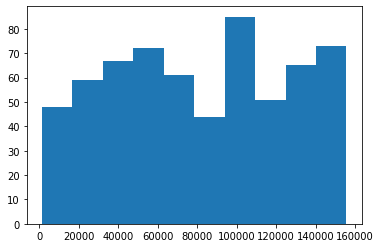

<IPython.core.display.Javascript object>

In [48]:
plot_character_hist(character_occurences, "elizabeth")

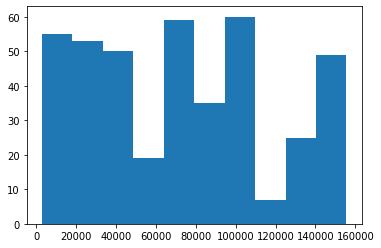

<IPython.core.display.Javascript object>

In [49]:
plot_character_hist(character_occurences, "darcy")

### Cumulative occurrences

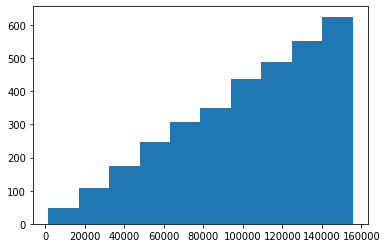

<IPython.core.display.Javascript object>

In [50]:
plot_character_hist(character_occurences, "elizabeth", cumulative=True)

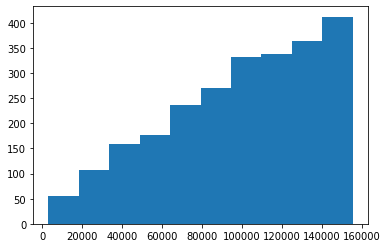

<IPython.core.display.Javascript object>

In [51]:
plot_character_hist(character_occurences, "darcy", cumulative=True)

### Spacy parse tree in action

[Hint](# "ent.subtree, token.pos_ == 'ADJ'") 

In [63]:
spacy.explain("acomp")

'adjectival complement'

<IPython.core.display.Javascript object>

In [102]:
# Find words (adjectives) that describe Mr. Darcy.


def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`

    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """

    adjectives = []

    for ent in doc.ents:

        if (
            ent.lemma_.lower() == character_lemma
        ):  ### Checks the token is referring to the character we select
            if ent.root.dep_ == "nsubj":  ###
                for child in ent.root.head.children:
                    if child.dep_ == "acomp":
                        adjectives.append(child.lemma_)

    return adjectives


print(get_character_adjectives(pap, "darcy"))

['clever', 'worth', 'politeness', 'grow', 'studious', 'sorry', 'unworthy', 'answerable', 'impatient', 'ashamed', 'proud', 'tall', 'punctual', 'engaged', 'delighted', 'fond']


<IPython.core.display.Javascript object>

In [103]:
# Find words (adjectives) that describe Elizabeth.


print(get_character_adjectives(pap, "elizabeth"))

['glad', 'catch', 'surprised', 'pleased', 'watchful', 'satisfied', 'prepared', 'thankful', 'entertain', 'surprised', 'surprised', 'eager', 'blind', 'disappointed', 'delighted', 'pleased', 'relieve', 'pleased', 'pleased', 'surprised', 'proceed', 'sorry', 'surprised', 'disgust', 'glad', 'please', 'determined', 'embarrassed', 'able', 'enough', 'acquainted']


<IPython.core.display.Javascript object>

For all the dependencies manual: https://nlp.stanford.edu/software/dependencies_manual.pdf

`acomp`: adjectival complement
*i.e.* an adjectival phrase which functions as the complement (like an object of the verb) e.g. "She looks very beautiful": *beautiful* is an adjectival complement of *looks*

`nsubj`: nominal subject
*i.e.* a noun phrase which is the syntactic subject of a clause. The head of this relation
might not always be a verb: when the verb is a copular verb, the root of the clause is the complement of
the copular verb, which can be an adjective or noun.
*e.g.* "Clinton defeated Dole". The relationship is *nsubj(defeated, Clinton)*

"The baby is cute". The relationship is *nsubj(cute, baby)*.

In the code, `.dep_`stands for syntactic dependency, *i.e.* the relation between tokens.

In [91]:
pap.ents[30].root.dep_

'npadvmod'

<IPython.core.display.Javascript object>

[Hint](# "ent.label_, ent.root.head.lemma_") 

In [116]:
# Find characters that are 'talking', 'saying', 'doing' the most. Find the relationship between 
# entities and corresponding root verbs.


def character_verb_counter(doc, verb):
    character_verb_counter = Counter()
    for ent in pap.ents:
        if ent.label_ =="PERSON":
    #         print(ent.root.head.lemma_)
            if ent.root.head.lemma_ == verb:
                character_verb_counter[ent.text] +=1
    return character_verb_counter.most_common(10)

print("\nDo")
print(character_verb_counter(pap, "do"))
print("\ntalk")
print(character_verb_counter(pap, "talk"))
print("\nSay")
print(character_verb_counter(pap, "say"))

# do the same for talking and doing




Do
[('Bingley', 5), ('Gardiner', 3), ('Darcy', 3), ('Elizabeth', 2), ('Lizzy', 2), ('Long', 1), ('William', 1), ('Louisa', 1), ('Lady Catherine', 1), ('Darcy!--and', 1)]

talk
[('Lady Catherine', 2), ('Phillips', 1), ('Collins', 1), ('Gardiner', 1)]

Say
[('Elizabeth', 46), ('Bennet', 28), ('Darcy', 14), ('Jane', 14), ('Bingley', 11), ('Gardiner', 5), ('Charlotte', 4), ('Lady Catherine', 4), ('Wickham', 4), ('Lizzy', 4)]


<IPython.core.display.Javascript object>

[Hint](# "ent.label_, ent.root.head.pos_") 

In [122]:
# Find 20 most used verbs
verb_counter = Counter()

# your code here
for ent in pap.ents:
    if ent.root.head.pos_ == "VERB":
        verb_counter[ent.root.head.lemma_] += 1
print(verb_counter.most_common(20))

[('say', 177), ('have', 84), ('see', 69), ('cry', 56), ('reply', 49), ('come', 44), ('leave', 44), ('go', 40), ('make', 32), ('look', 32), ('give', 27), ('tell', 27), ('take', 26), ('do', 23), ('think', 23), ('know', 22), ('begin', 21), ('write', 18), ('feel', 17), ('pass', 17)]


<IPython.core.display.Javascript object>

In [125]:
# Create a dataframe with the most used verb and how many time a character used the verb

import pandas as pd
verb_characters = {}
verb_list = [verb[0] for verb in verb_counter.most_common(20)]
for ent in pap.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ in verb_list:
        if not ent.lemma_ in verb_characters.keys():
            verb_characters[ent.lemma_] = {verb:0 for verb in verb_list}
        verb_characters[ent.lemma_][ent.root.head.lemma_] += 1
        



<IPython.core.display.Javascript object>

In [127]:
df = pd.DataFrame(verb_characters)
df

,Bennet,Long,Netherfield,Bingley,Lizzy,Elizabeth,Kitty,Hurst,Darcy,Charlotte,...,Colonel Forster,Brighton,F.,John,Sally,jane,Hill,Lydia Bennet,Darcy!--and,Sarah
say,28,2,0,11,4,47,0,0,14,4,...,0,0,0,0,0,1,0,0,0,0
have,7,1,0,3,3,18,0,1,10,2,...,0,0,0,0,0,0,0,0,0,0
see,2,0,0,4,1,16,0,0,9,1,...,0,0,0,0,0,1,0,0,0,0
cry,3,0,0,6,1,24,0,1,3,0,...,0,0,0,0,0,1,1,0,0,0
reply,2,0,0,2,0,18,2,0,7,2,...,0,0,0,0,0,0,0,0,0,0
come,0,1,0,4,1,0,0,0,3,1,...,1,0,1,0,0,0,1,1,0,1
leave,2,0,2,2,0,4,0,0,3,0,...,0,3,0,0,0,0,0,0,0,0
go,2,0,0,0,1,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
make,2,0,0,3,0,7,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
look,1,0,0,1,0,8,0,2,5,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [128]:
# drop the less meaningful columns
df = df[df.columns[df.sum() >= 10]].sort_index()
df

,Bennet,Bingley,Lizzy,Elizabeth,Darcy,Charlotte,Jane,Lady Catherine,Collins,Wickham,Gardiner
begin,1,1,0,4,0,0,0,1,2,3,1
come,0,4,1,0,3,1,2,0,1,2,0
cry,3,6,1,24,3,0,3,0,2,1,2
do,0,5,2,2,4,0,0,1,0,0,3
feel,0,0,0,12,1,0,2,0,0,0,0
give,3,0,2,2,3,0,1,0,0,1,2
go,2,0,1,5,0,0,3,0,1,3,2
have,7,3,3,18,10,2,6,2,8,5,0
know,0,4,2,3,2,0,1,0,1,1,0
leave,2,2,0,4,3,0,0,0,0,1,2


<IPython.core.display.Javascript object>

In [129]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df, annot=True, cmap='Blues')
df.style.background_gradient(cmap='Blues')


ModuleNotFoundError: No module named 'seaborn'

<IPython.core.display.Javascript object>